# The Relationship between Prosperity Levels and Inflation, Investment, and Gender Equality in the World Before the COVID-19 Pandemic

* Nama : Prasetyo Widyantoro
* Statistics For Business - Economic Indicators

Dalam riset ini akan membahas mengenai hubungan antara tingkat kemakmuran suatu negara yang diwakili dengan nilai Gross Domestic Product Percapita (GDPP) dalam bentuk USD dengan tingkat inflasi, Foreign Direct Investment (FDI) dan Kesetaraan Gender sebelum pandemi COVID-19.

GDP Percapita adalah salah satu indikator ekonomi yang mengukur rata-rata nilai dari seluruh barang dan jasa yang dihasilkan oleh suatu negara, GDP Percapita digunakan sebagai ukuran standar untuk mengukur tingkat kemakmuran ekonomi suatu negara dan membandingkan kesejahteraan penduduknya dengan negara lain. Semakin tinggi GDP Percapita suatu negara, semakin tinggi juga pendapatan rata-rata per individu di negara tersebut, dan ini biasanya dikaitkan dengan tingkat hidup yang lebih baik.

Foreign Direct Investment (FDI) atau Investasi Langsung Asing adalah suatu bentuk investasi yang dilakukan oleh individu, perusahaan, atau entitas ekonomi asing untuk mendirikan atau mengakuisisi bisnis atau aset produktif di negara lain.

Tingkat inflasi mengacu pada tingkat kenaikan harga-harga secara umum dalam suatu ekonomi dalam periode waktu tertentu. Dalam kata lain, inflasi adalah laju atau persentase perubahan harga-harga barang dan jasa secara keseluruhan dalam suatu negara atau wilayah tertentu selama jangka waktu tertentu.

Gender inequality adalah ketidaksetaraan atau ketidakadilan yang terjadi antara laki-laki dan perempuan dalam berbagai aspek kehidupan, termasuk akses terhadap kesempatan, sumber daya, dan hak-hak sosial, ekonomi, dan politik. Ketidaksetaraan gender dapat muncul dalam berbagai bentuk, termasuk pendapatan, kesempatan pendidikan, partisipasi politik, dan akses terhadap layanan kesehatan.

Riset ini akan menggunakan metode statistik linear regression dengan multiple predictor untuk mencari seberapa besar hubungan antara variabel y Gross Domestic Product Percapita (GDPP) dengan variabel x (tingkat inflasi, Foreign Direct Investment (FDI), Kesetaraan Gender). 

## Data dan Sumber Data

Data yang digunakan merupakan data yang dikumpulkan melalui sumber data yakni Bank Dunia (World Bank), UNDP, dan macrotrends pada tahun 2019. Sample negara yang digunakan yaitu 118 negara (baris) dan 5 kolom :

* country_name, merupakan negara-negara yang akan diobservasi.
* gdpp, GDP Percapita adalah salah satu indikator ekonomi yang mengukur rata-rata nilai dari seluruh barang dan jasa yang dihasilkan oleh suatu negara dalam USD.
* fdi, Investasi Langsung Asing adalah suatu bentuk investasi yang dilakukan oleh individu, perusahaan, atau entitas ekonomi asing untuk mendirikan atau mengakuisisi bisnis atau aset produktif di negara lain dalam Miliar USD.
* inflation, inflasi atau tingkat kenaikan harga-harga secara umum dalam suatu ekonomi dalam periode waktu tertentu dalam bentuk persentase yang dikonversi menjadi desimal
* gender_inequality, ketidaksetaraan atau ketidakadilan yang terjadi antara laki-laki dan perempuan dalam berbagai aspek kehidupan dengan Skor 0-1.

## Proses Eksplorasi dan Uji Statistik

Kita ingin melihat prediksi gdpp dengan menggunakan tingkat inflasi, Foreign Direct Investment (FDI), dan Kesetaraan Gender kita dapat menggunakan Linear Regression dengan Multiple Predictor.

 1. Data Preparation 
    * Data Collection
    * Mengubah tipe data yang tidak sesuai
    * Standarisasi nilai dari fdi menjadi dalam miliar rupiah
    * Hanya mengambil nilai fdi yang positif atau diatas nol saja
    * Hanya mengambil nilai inflasi diatas 0 dan dibawah 15% atau 0.15% saja
 2. Exploratory Data Analysis
    * melihat 10 Teratas dan terbawah negara pada masing masing variabel.
    * Melakukan labeling pada data jika gdpp > 20.000 maka akan dilabeli high dan dibawah itu dilabeli growth. Hal ini sesuai dengan laporan bank dunia pada tahun 2021.
    * Melihat Proporsi data setelah dilabeli
    * Melihat Distribusi Data
    * Cek Korelasi Data
    * Melihat Outlier dari Data
 3. Statistical Inference
    * Uji Proporsi Dua Sampel, Uji proporsi dua sampel adalah metode statistik yang digunakan untuk membandingkan dua proporsi dari dua kelompok yang berbeda yakni sampel yang memiliki label gdpp_level growth dan gdpp_level high. Untuk menghitung dua sampel uji z proporsi, kita dapat menggunakan stats.ttest_ind
  4. Linear Regression
     * Cek Linearitas Data dengan menggunakan Scatterplot
     * Transformasi Log
     * Linear Regression dengan menggunakan multiple predictor yakni log_fdi, log_inflation, log_gender_inequality dengan outcome log_gdpp beserta interpretasi koefisien, rsquare, prob f-stats, prob t-stats, dan Prob(JB).
     * Menguji model dengan uji asumsi seperti normalitas residual, homokedastisitas, linearitas, linearitas variabel prediktor.
     

# Data Preparation

# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy import stats
from statsmodels.stats.diagnostic import het_breuschpagan, linear_rainbow
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results
    :return df: <pandas DataFrame> 
    """
    coef = results.params
    std_err = results.bse
    
    df = pd.DataFrame(data = np.transpose([coef, std_err]), 
                      index = coef.index, 
                      columns=["coef","std err"])
    return df

# Read Data - Data Collection

In [3]:
df_ekonomi = pd.read_excel("dataset_ekonomi.xlsx")

In [4]:
df_ekonomi

,country_name,fdi,inflation,gender_inequality,gdpp
0,Albania,1201022154,0.0141,0.156,5396
1,Algeria,1381200050,0.0195,0.437,3990
2,Angola,-4098478748,0.1708,0.537,2178
3,Argentina,6663062112,0.5355,0.306,10076
4,Armenia,100946084,0.0144,0.239,4605
...,...,...,...,...,...
136,Venezuela,-128015213,95.86,0.492,2299
137,Vietnam,16120000000,0.028,0.305,3425
138,Yemen,-370982778,0.1201,0.785,751
139,Zambia,547967910,0.0915,0.534,1305


# Data Validation

## Data Type

In [5]:
# Cek tipe data dengan menggunakan info()
df_ekonomi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country_name       141 non-null    object 
 1   fdi                141 non-null    int64  
 2   inflation          141 non-null    object 
 3   gender_inequality  141 non-null    float64
 4   gdpp               141 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.6+ KB


In [6]:
## Ubah tipe data inflation menjadi float
df_ekonomi['inflation'] = df_ekonomi['inflation'].astype(float)

In [7]:
# Mengambil kolom-kolom numerik
numeric_columns = df_ekonomi.select_dtypes(include=['float64', 'int64'])

# Menampilkan rentang nilai pada masing-masing kolom
for column in numeric_columns.columns:
    min_value = numeric_columns[column].min()
    max_value = numeric_columns[column].max()
    print(f"Rentang nilai pada kolom {column}: {min_value} - {max_value}")

Rentang nilai pada kolom fdi: -169297602702 - 302199000000
Rentang nilai pada kolom inflation: -0.0323 - 95.86
Rentang nilai pada kolom gender_inequality: 0.016 - 0.785
Rentang nilai pada kolom gdpp: 224 - 113219


In [8]:
# Standarisasi kolom fdi dengan suatu alasan yakni terlalu besar valuenya maka akan dibagi dengan 1 miliar
df_ekonomi["fdi"] = df_ekonomi["fdi"]/1_000_000_000

In [9]:
# Menghapus baris yang memiliki nilai minus pada kolom 'fdi'
df_ekonomi = df_ekonomi[df_ekonomi['fdi'] >= 0]

In [10]:
# Menghapus baris dengan nilai 'inflation' negatif dan di atas 0.15
df_ekonomi = df_ekonomi[(df_ekonomi['inflation'] >= 0) & (df_ekonomi['inflation'] <= 0.15)]

In [11]:
# Mengambil kolom-kolom numerik
numeric_columns = df_ekonomi.select_dtypes(include=['float64', 'int64'])

# Menampilkan rentang nilai pada masing-masing kolom
for column in numeric_columns.columns:
    min_value = numeric_columns[column].min()
    max_value = numeric_columns[column].max()
    print(f"Rentang nilai pada kolom {column}: {min_value} - {max_value}")

Rentang nilai pada kolom fdi: 0.035732593 - 302.199
Rentang nilai pada kolom inflation: 0.0008 - 0.114
Rentang nilai pada kolom gender_inequality: 0.016 - 0.683
Rentang nilai pada kolom gdpp: 507 - 113219


## Check Nilai Null

In [12]:
#Menghitung nilai null pada kolom
df_ekonomi.isnull().sum()

country_name         0
fdi                  0
inflation            0
gender_inequality    0
gdpp                 0
dtype: int64

## Melihat statistik deskriptif dan Range Data Numerikal

In [13]:
#Melihat statistika deskriptif dengan describe()
df_ekonomi.describe()

,fdi,inflation,gender_inequality,gdpp
count,112.000000,112.000000,112.000000,112.000000
mean,14.787182,0.029524,0.297063,16115.482143
std,37.702274,0.024669,0.180107,20074.552935
min,0.035733,0.000800,0.016000,507.000000
25%,0.636437,0.011100,0.121750,3377.500000
50%,2.235338,0.023600,0.296500,7472.000000
75%,10.428062,0.037300,0.449500,20514.750000
max,302.199000,0.114000,0.683000,113219.000000


## Melihat Dimensi Data

In [14]:
df_ekonomi.shape

(112, 5)

# Exploratory Data Analysis

## 10 Tertinggi GDPP

In [15]:
# Ganti 'GDP per Capita' dengan nama kolom yang ingin Anda cari nilai tertingginya
column_to_find_top_values = 'gdpp'

# Mencari 10 nilai tertinggi pada kolom 'GDP per Capita' beserta nama negara
top_10_values = df_ekonomi.nlargest(10, column_to_find_top_values)[['country_name', column_to_find_top_values]]

# Reset index agar index berurutan dari 1 hingga 10
top_10_values.reset_index(drop=True, inplace=True)

# Memberikan penomoran 1 hingga 10 pada indeks
top_10_values.index = range(1, 11)

# Menampilkan hasil
print(top_10_values)

      country_name    gdpp
1     Luxembourg    113219
2    Switzerland     85335
3         Norway     75720
4      Singapore     65831
5   United States    65095
6      Australia     54875
7         Sweden     51939
8        Finland     48629
9        Hong Kong   48356
10       Germany     46795


## 10 Terendah GDPP

In [16]:
# Ganti 'GDP per Capita' dengan nama kolom yang ingin Anda cari nilai tertingginya
column_to_find_top_values = 'gdpp'

# Mencari 10 nilai tertinggi pada kolom 'GDP per Capita' beserta nama negara
top_10_values = df_ekonomi.nsmallest(10, column_to_find_top_values)[['country_name', column_to_find_top_values]]

# Reset index agar index berurutan dari 1 hingga 10
top_10_values.reset_index(drop=True, inplace=True)

# Memberikan penomoran 1 hingga 10 pada indeks
top_10_values.index = range(1, 11)

# Menampilkan hasil
print(top_10_values)

    country_name  gdpp
1   Mozambique     507
2   Madagascar     526
3       Malawi     592
4         Gambia   773
5       Uganda     799
6       Rwanda     820
7   Tajikistan     891
8       Guinea    1053
9     Tanzania    1086
10     Lesotho    1153


## 10 Tertinggi Inflasi

In [17]:
# Ganti 'GDP per Capita' dengan nama kolom yang ingin Anda cari nilai tertingginya
column_to_find_top_values = 'inflation'

# Mencari 10 nilai tertinggi pada kolom 'GDP per Capita' beserta nama negara
top_10_values = df_ekonomi.nlargest(10, column_to_find_top_values)[['country_name', column_to_find_top_values]]

# Reset index agar index berurutan dari 1 hingga 10
top_10_values.reset_index(drop=True, inplace=True)

# Memberikan penomoran 1 hingga 10 pada indeks
top_10_values.index = range(1, 11)

# Menampilkan hasil
print(top_10_values)

    country_name  inflation
1      Nigeria       0.1140
2     Pakistan       0.1058
3       Guinea       0.0947
4       Malawi       0.0937
5        Egypt       0.0915
6       Zambia       0.0915
7   Tajikistan       0.0797
8      Ukraine       0.0789
9      Uruguay       0.0788
10       Ghana       0.0714


## 10 Terendah Inflasi

In [18]:
# Ganti 'GDP per Capita' dengan nama kolom yang ingin Anda cari nilai tertingginya
column_to_find_top_values = 'inflation'

# Mencari 10 nilai tertinggi pada kolom 'GDP per Capita' beserta nama negara
top_10_values = df_ekonomi.nsmallest(10, column_to_find_top_values)[['country_name', column_to_find_top_values]]

# Reset index agar index berurutan dari 1 hingga 10
top_10_values.reset_index(drop=True, inplace=True)

# Memberikan penomoran 1 hingga 10 pada indeks
top_10_values.index = range(1, 11)

# Menampilkan hasil
print(top_10_values)

     country_name  inflation
1    El Salvador      0.0008
2          Oman       0.0013
3        Cyprus       0.0025
4        Greece       0.0025
5       Ecuador       0.0027
6       Morocco       0.0030
7      Portugal       0.0034
8    Montenegro       0.0036
9   Switzerland       0.0036
10    South Korea     0.0038


## 10 Tertinggi fdi

In [19]:
# Ganti 'GDP per Capita' dengan nama kolom yang ingin Anda cari nilai tertingginya
column_to_find_top_values = 'fdi'

# Mencari 10 nilai tertinggi pada kolom 'GDP per Capita' beserta nama negara
top_10_values = df_ekonomi.nlargest(10, column_to_find_top_values)[['country_name', column_to_find_top_values]]

# Reset index agar index berurutan dari 1 hingga 10
top_10_values.reset_index(drop=True, inplace=True)

# Memberikan penomoran 1 hingga 10 pada indeks
top_10_values.index = range(1, 11)

# Menampilkan hasil
print(top_10_values)

      country_name         fdi
1   United States   302.199000
2          China    187.169822
3      Singapore    111.479508
4        Hungary     98.501590
5        Germany     71.679659
6         Brazil     69.174412
7        Hong Kong   58.299361
8         France     57.482772
9          India     50.610647
10        Canada     48.547493


## 10 Terendah fdi

In [20]:
# Ganti 'GDP per Capita' dengan nama kolom yang ingin Anda cari nilai tertingginya
column_to_find_top_values = 'fdi'

# Mencari 10 nilai tertinggi pada kolom 'GDP per Capita' beserta nama negara
top_10_values = df_ekonomi.nsmallest(10, column_to_find_top_values)[['country_name', column_to_find_top_values]]

# Reset index agar index berurutan dari 1 hingga 10
top_10_values.reset_index(drop=True, inplace=True)

# Memberikan penomoran 1 hingga 10 pada indeks
top_10_values.index = range(1, 11)

# Menampilkan hasil
print(top_10_values)

           country_name       fdi
1             Lesotho    0.035733
2              Guinea    0.044400
3              Malawi    0.055268
4                Gambia  0.071083
5            Botswana    0.093607
6                Taiwan  0.098552
7             Armenia    0.100946
8           Cape Verde   0.103176
9            Eswatini    0.127971
10  Trinidad and Tobago  0.183973


## 10 Tertinggi gender_inequality

In [21]:
# Ganti 'GDP per Capita' dengan nama kolom yang ingin Anda cari nilai tertingginya
column_to_find_top_values = 'gender_inequality'

# Mencari 10 nilai tertinggi pada kolom 'GDP per Capita' beserta nama negara
top_10_values = df_ekonomi.nlargest(10, column_to_find_top_values)[['country_name', column_to_find_top_values]]

# Reset index agar index berurutan dari 1 hingga 10
top_10_values.reset_index(drop=True, inplace=True)

# Memberikan penomoran 1 hingga 10 pada indeks
top_10_values.index = range(1, 11)

# Menampilkan hasil
print(top_10_values)

         country_name  gender_inequality
1           Nigeria                0.683
2   Republic Of Congo              0.610
3            Guinea                0.607
4              Gambia              0.605
5          Cameroon                0.570
6          Eswatini                0.561
7          Tanzania                0.561
8        Madagascar                0.558
9           Lesotho                0.557
10           Malawi                0.555


## 10 Terendah gender_inequality

In [22]:
# Ganti 'GDP per Capita' dengan nama kolom yang ingin Anda cari nilai tertingginya
column_to_find_top_values = 'gender_inequality'

# Mencari 10 nilai tertinggi pada kolom 'GDP per Capita' beserta nama negara
top_10_values = df_ekonomi.nsmallest(10, column_to_find_top_values)[['country_name', column_to_find_top_values]]

# Reset index agar index berurutan dari 1 hingga 10
top_10_values.reset_index(drop=True, inplace=True)

# Memberikan penomoran 1 hingga 10 pada indeks
top_10_values.index = range(1, 11)

# Menampilkan hasil
print(top_10_values)

     country_name  gender_inequality
1        Norway                0.016
2   Switzerland                0.018
3        Sweden                0.024
4       Finland                0.031
5          Taiwan              0.045
6     Singapore                0.051
7       Hong Kong              0.054
8         Italy                0.054
9         Spain                0.056
10   Luxembourg                0.062


In [23]:
# Menambahkan kolom baru dengan label 'rendah' dan 'tinggi'
df_ekonomi['gdpp_level'] = ['growth' if value < 20_000 else 'high' for value in df_ekonomi['gdpp']]

In [24]:
# Sanity Check
df_ekonomi[df_ekonomi['gdpp_level'] == "high"]

,country_name,fdi,inflation,gender_inequality,gdpp,gdpp_level
5,Australia,39.101199,0.0161,0.080,54875,high
8,Bahrain,1.501330,0.0101,0.186,23552,high
23,Canada,48.547493,0.0195,0.069,46329,high
32,Cyprus,41.997343,0.0025,0.109,29206,high
33,Czech Republic,10.752121,0.0285,0.124,23660,high
39,Estonia,3.063088,0.0228,0.092,23398,high
42,Finland,15.611669,0.0102,0.031,48629,high
43,France,57.482772,0.0111,0.086,40579,high
47,Germany,71.679659,0.0145,0.079,46795,high
54,Hong Kong,58.299361,0.0288,0.054,48356,high


In [25]:
# Sanity Check
df_ekonomi[df_ekonomi['gdpp_level'] == "growth"]

,country_name,fdi,inflation,gender_inequality,gdpp,gdpp_level
0,Albania,1.201022,0.0141,0.156,5396,growth
1,Algeria,1.381200,0.0195,0.437,3990,growth
4,Armenia,0.100946,0.0144,0.239,4605,growth
7,Azerbaijan,1.503918,0.0261,0.314,4806,growth
9,Bangladesh,1.908045,0.0559,0.531,2154,growth
...,...,...,...,...,...,...
131,Uganda,1.273886,0.0287,0.530,799,growth
132,Ukraine,5.796000,0.0789,0.205,3661,growth
135,Uruguay,1.408833,0.0788,0.253,17688,growth
137,Vietnam,16.120000,0.0280,0.305,3425,growth


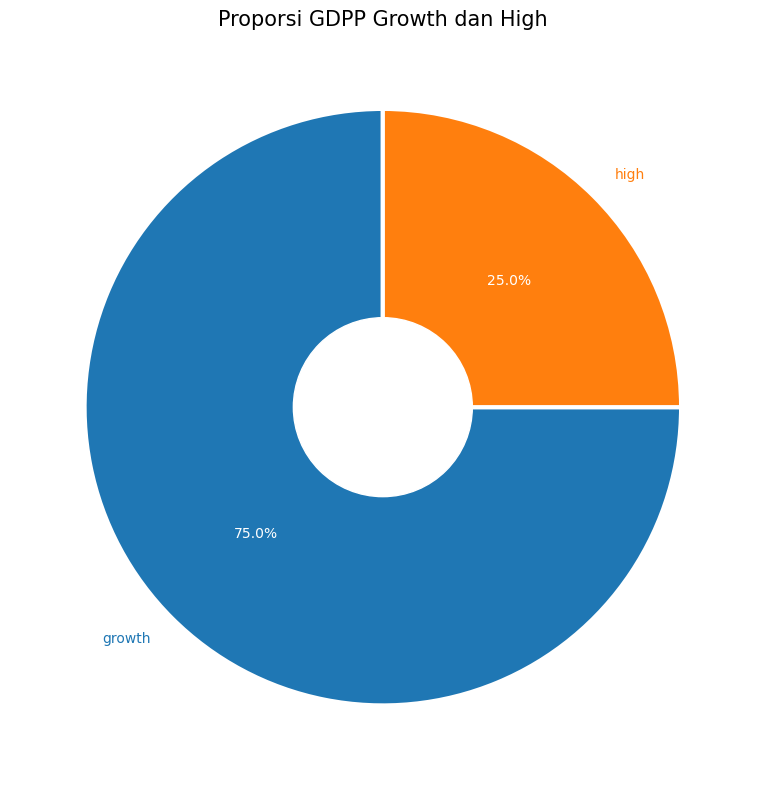

In [26]:
# Menghitung jumlah data Non Fraud dan Fraud
proporsi_level = df_ekonomi.groupby("gdpp_level")["gender_inequality"].count().reset_index()
proporsi_level.rename(columns = {"gender_inequality":"count"}, inplace=True)

# Menyimpan nilai kategori Non Fraud dan Fraud
level_gdpp = proporsi_level["gdpp_level"].map({"growth": "growth", "high": "high"})
count_level_gdpp = proporsi_level["count"]

# Melakukan visualisasi data dengan menggunakan doughnut chart
fig, ax = plt.subplots(figsize=(10, 8))

# Membuat doughnut chart dengan menggunakan pie plot
patches, texts, pcts = ax.pie(
    count_level_gdpp, labels=level_gdpp, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'medium'},
    startangle=90)

# Mengatur warna teks sesuai dengan warna setiap slice
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())

# Membuat lingkaran di tengah doughnut chart
central_circle = plt.Circle((0, 0), 0.3, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)

# Mengatur warna persentase teks menjadi putih
plt.setp(pcts, color='white')
# Mengatur teks dengan fontweight 100
plt.setp(texts, fontweight=100)

# Memberikan judul pada doughnut chart
ax.set_title('Proporsi GDPP Growth dan High', fontsize=15)

# Menyesuaikan tata letak plot
plt.tight_layout()

In [27]:
# Value Count dari Exited
df_ekonomi.gdpp_level.value_counts()

growth    84
high      28
Name: gdpp_level, dtype: int64

In [28]:
# cek skewness
df_ekonomi.skew(numeric_only = True)

fdi                  5.276136
inflation            1.416800
gender_inequality    0.132249
gdpp                 2.167201
dtype: float64

In [29]:
#Sanity Check
df_ekonomi

,country_name,fdi,inflation,gender_inequality,gdpp,gdpp_level
0,Albania,1.201022,0.0141,0.156,5396,growth
1,Algeria,1.381200,0.0195,0.437,3990,growth
4,Armenia,0.100946,0.0144,0.239,4605,growth
5,Australia,39.101199,0.0161,0.080,54875,high
7,Azerbaijan,1.503918,0.0261,0.314,4806,growth
...,...,...,...,...,...,...
133,United Kingdom,2.236675,0.0174,0.106,43070,high
134,United States,302.199000,0.0181,0.189,65095,high
135,Uruguay,1.408833,0.0788,0.253,17688,growth
137,Vietnam,16.120000,0.0280,0.305,3425,growth


# Melihat Distribusi Data

### Distribusi Data Keseluruhan

C:\Users\hp\AppData\Local\Temp\ipykernel_19872\918973451.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_ekonomi[col], shade=True, ax=axes[ax_row, ax_col])
C:\Users\hp\AppData\Local\Temp\ipykernel_19872\918973451.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_ekonomi[col], shade=True, ax=axes[ax_row, ax_col])
C:\Users\hp\AppData\Local\Temp\ipykernel_19872\918973451.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_ekonomi[col], shade=True, ax=axes[ax_row, ax_col])
C:\Users\hp\AppData\Local\Temp\ipykernel_19872\918973451.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `

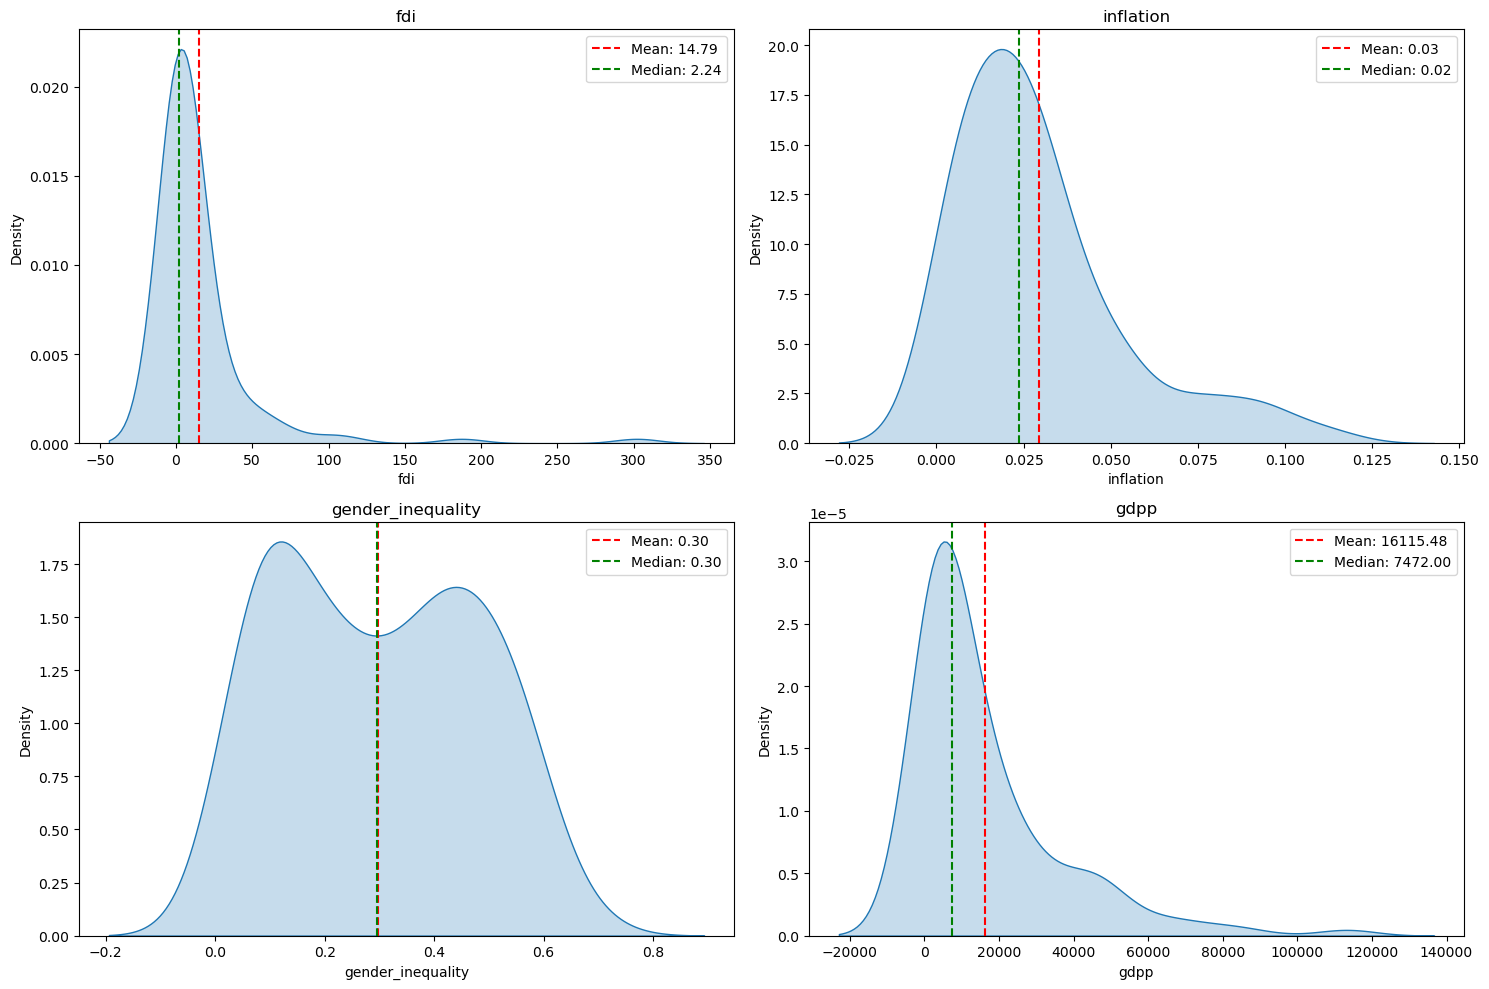

In [30]:
# Memfilter kolom hanya untuk kolom numerik
numeric_cols = df_ekonomi.select_dtypes(include='number').columns

# menghitung jumlah baris dan kolom untuk subplots
n_rows = (len(numeric_cols) - 1) // 2 + 1
n_cols = min(len(numeric_cols), 2)

# membuat subplots dengan ukuran 15x5 inci
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Mengubah axes menjadi list agar berfungsi dengan benar ketika hanya ada satu kolom numerik
if n_rows == 1 and n_cols == 1:
    axes = [axes]

# looping untuk melakukan visualisasi distribusi data setiap kolom menggunakan kdeplot dengan central tendency didalamnya
for i, col in enumerate(numeric_cols):
    if n_rows > 1:
        ax_row = i // n_cols
        ax_col = i % n_cols
    else:
        ax_row = 0
        ax_col = i
    sns.kdeplot(df_ekonomi[col], shade=True, ax=axes[ax_row, ax_col])
    mean_value = df_ekonomi[col].mean()
    median_value = df_ekonomi[col].median()
    axes[ax_row, ax_col].axvline(mean_value, color='red', linestyle='--', label=f"Mean: {mean_value:.2f}")
    axes[ax_row, ax_col].axvline(median_value, color='green', linestyle='--', label=f"Median: {median_value:.2f}")
    axes[ax_row, ax_col].set_title(col)
    axes[ax_row, ax_col].legend()

# mengatur layout dan jarak antar subplots
plt.tight_layout()

# Menampilkan plot
plt.show()

## Distribusi Data Berdasarkan gdpp_level

C:\Users\hp\AppData\Local\Temp\ipykernel_19872\1597942369.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  stay_kde = sns.kdeplot(df_ekonomi[col][df_ekonomi["gdpp_level"] == "growth"], color="Red", shade=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_19872\1597942369.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  exit_kde = sns.kdeplot(df_ekonomi[col][df_ekonomi["gdpp_level"] == "high"], ax=stay_kde, color="Blue", shade=True)


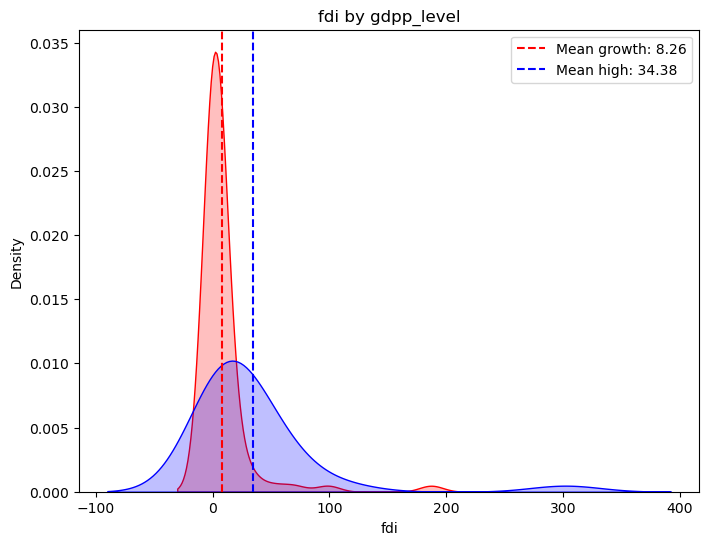

C:\Users\hp\AppData\Local\Temp\ipykernel_19872\1597942369.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  stay_kde = sns.kdeplot(df_ekonomi[col][df_ekonomi["gdpp_level"] == "growth"], color="Red", shade=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_19872\1597942369.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  exit_kde = sns.kdeplot(df_ekonomi[col][df_ekonomi["gdpp_level"] == "high"], ax=stay_kde, color="Blue", shade=True)


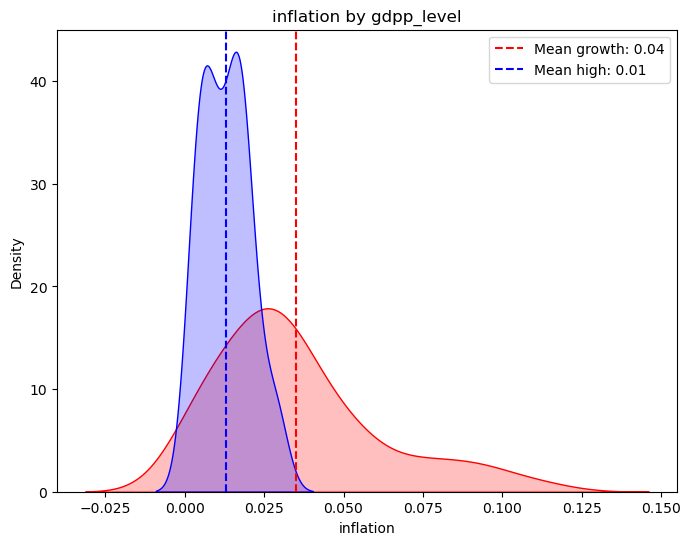

C:\Users\hp\AppData\Local\Temp\ipykernel_19872\1597942369.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  stay_kde = sns.kdeplot(df_ekonomi[col][df_ekonomi["gdpp_level"] == "growth"], color="Red", shade=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_19872\1597942369.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  exit_kde = sns.kdeplot(df_ekonomi[col][df_ekonomi["gdpp_level"] == "high"], ax=stay_kde, color="Blue", shade=True)


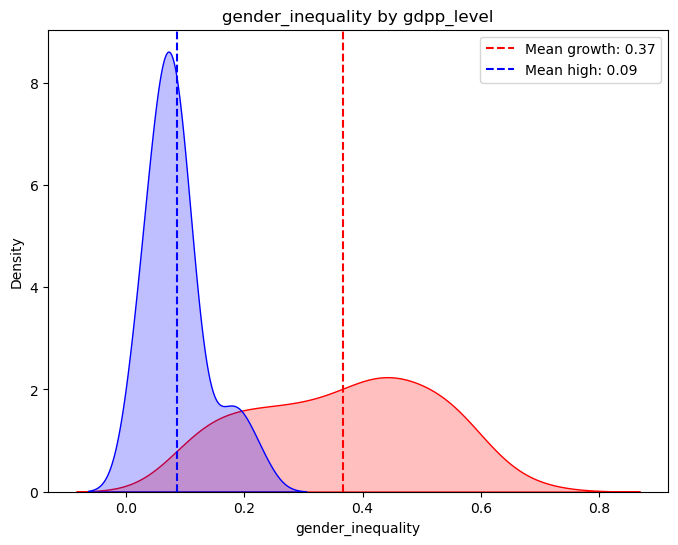

C:\Users\hp\AppData\Local\Temp\ipykernel_19872\1597942369.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  stay_kde = sns.kdeplot(df_ekonomi[col][df_ekonomi["gdpp_level"] == "growth"], color="Red", shade=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_19872\1597942369.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  exit_kde = sns.kdeplot(df_ekonomi[col][df_ekonomi["gdpp_level"] == "high"], ax=stay_kde, color="Blue", shade=True)


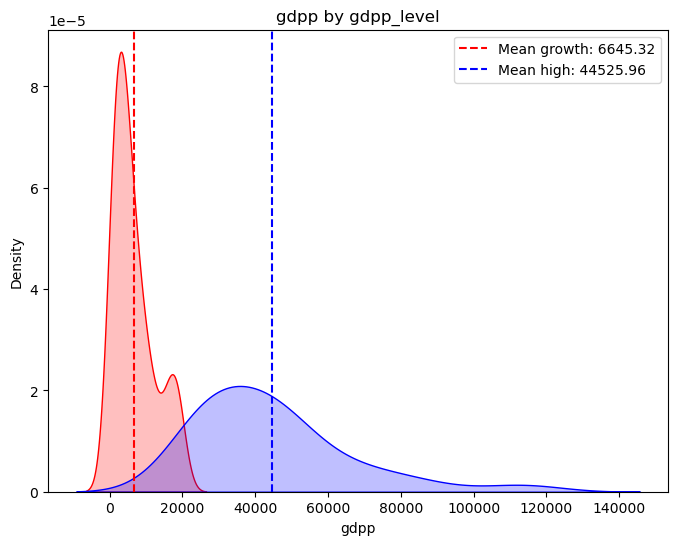

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mengambil kolom-kolom numerik saja
numeric_cols = df_ekonomi.select_dtypes(include='number').columns

# Meloop melalui setiap kolom numerik
for col in numeric_cols:
    # Membuat plot KDE untuk nilai 'growth'
    plt.figure(figsize=(8, 6))
    stay_kde = sns.kdeplot(df_ekonomi[col][df_ekonomi["gdpp_level"] == "growth"], color="Red", shade=True)
    
    # Membuat plot KDE untuk nilai 'high'
    exit_kde = sns.kdeplot(df_ekonomi[col][df_ekonomi["gdpp_level"] == "high"], ax=stay_kde, color="Blue", shade=True)
    
    # Menambahkan legenda
    exit_kde.legend(["growth", "high"], loc='upper right')
    
    # Mengatur label sumbu y
    exit_kde.set_ylabel('Density')
    
    # Mengatur label sumbu x
    exit_kde.set_xlabel(col)
    
    # Mengatur judul plot
    exit_kde.set_title(f'{col} by gdpp_level')
    
    # Menambahkan garis vertikal untuk menunjukkan rata-rata 'growth'
    stay_mean = df_ekonomi[col][df_ekonomi["gdpp_level"] == "growth"].mean()
    plt.axvline(stay_mean, 0, 1, color="r", linestyle='--', label=f"Mean growth: {stay_mean:.2f}")
    
    # Menambahkan garis vertikal untuk menunjukkan rata-rata 'high'
    exit_mean = df_ekonomi[col][df_ekonomi["gdpp_level"] == "high"].mean()
    plt.axvline(exit_mean, 0, 1, color="b", linestyle='--', label=f"Mean high: {exit_mean:.2f}")
    
    # Menampilkan legenda
    plt.legend()
    
    plt.show()


## Melihat Outlier Data

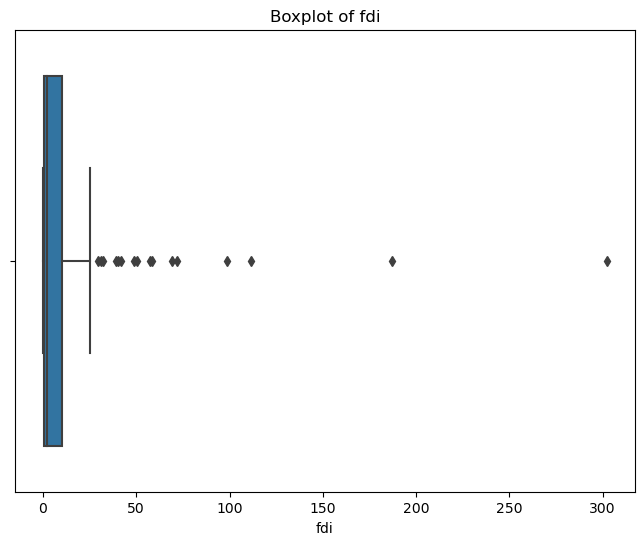

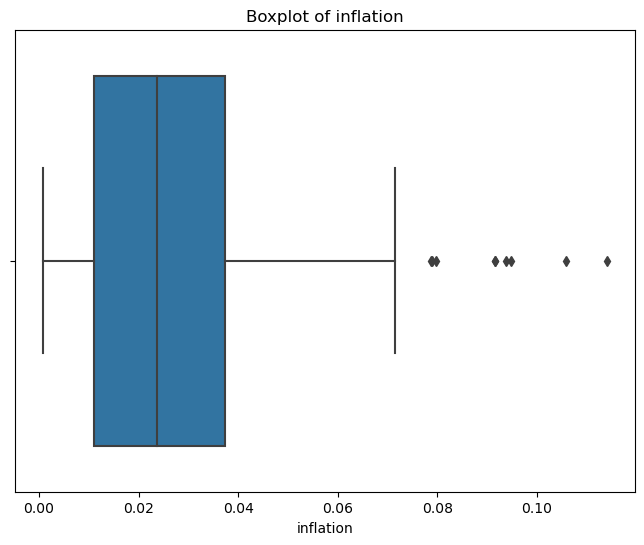

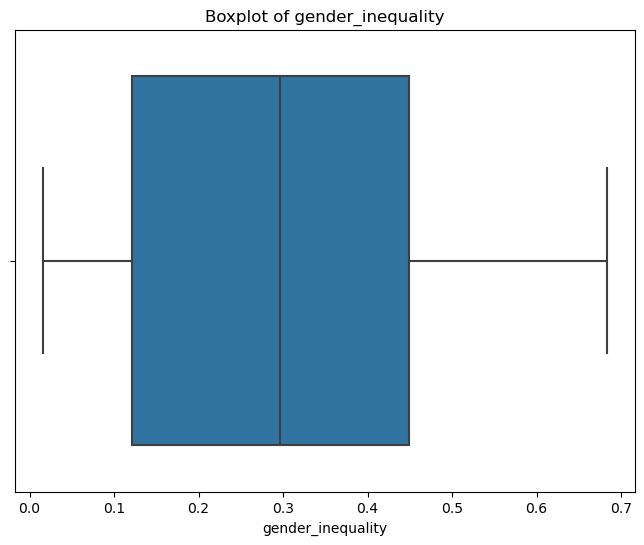

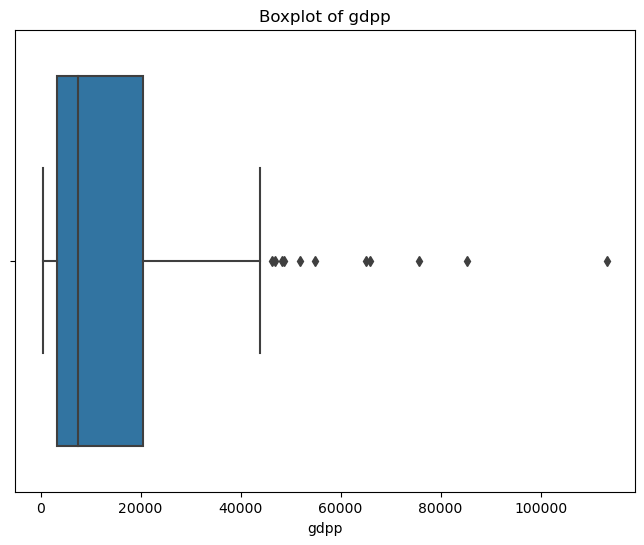

In [32]:
# Mengambil kolom-kolom numerik saja
numeric_cols = df_ekonomi.select_dtypes(include='number').columns

# Meloop melalui setiap kolom numerik
for col in numeric_cols:
    # Menampilkan distribusi data menggunakan boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_ekonomi, x=col)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.show()

## Cek Korelasi Data

C:\Users\hp\AppData\Local\Temp\ipykernel_19872\774905888.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_ekonomi.corr(method='pearson', min_periods=1),annot=True)


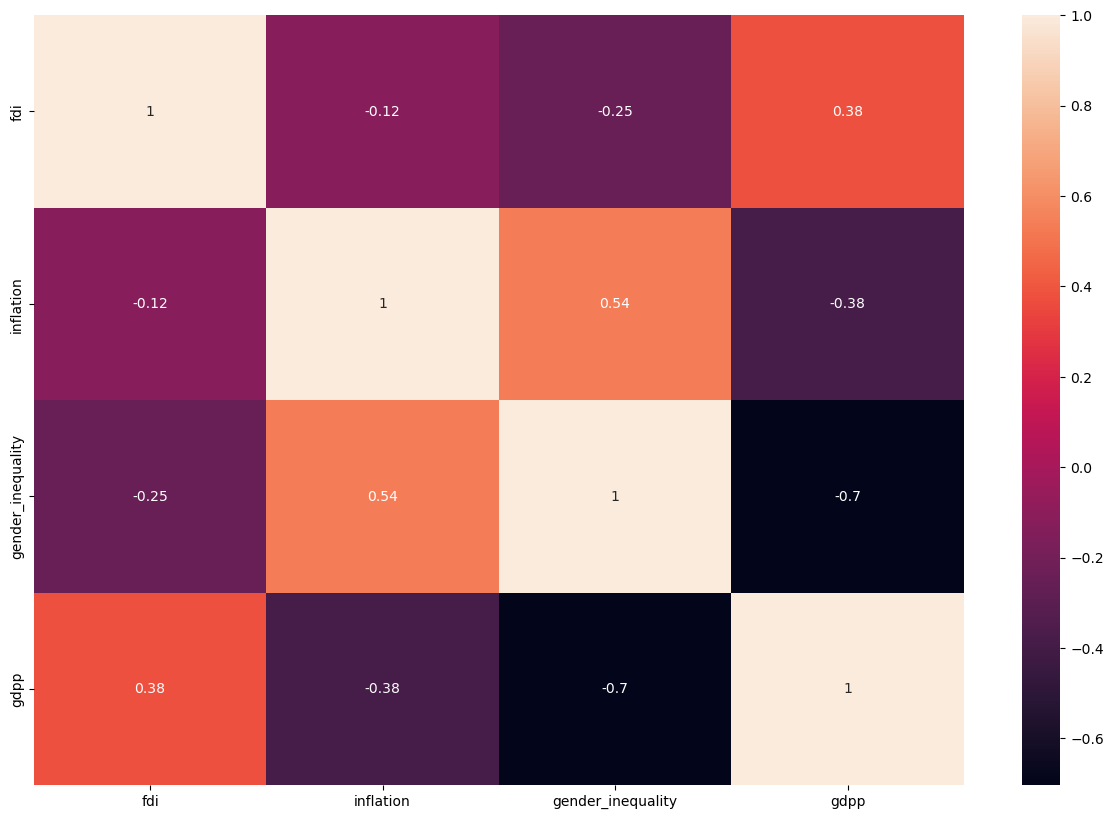

In [33]:
# pearson
plt.figure(figsize=(15,10))
sns.heatmap(df_ekonomi.corr(method='pearson', min_periods=1),annot=True)
# save the plot
plt.show()

# Statistical Inference

## FDI

Null hypothesis ($H_0$), alternative hypothesis ($H_1$), and significance level

$H_0$: Nilai FDI dinegara yang memiliki level gdpp growth dan high sama. 
$$ H_0:\mu_A = \mu_B $$

$H_1$: Nilai FDI dinegara yang memiliki level gdpp growth dan high tidak sama. 
$$ H_1:\mu_A \geq \mu_B $$

Significance level = 0.05

In [34]:
df_ekonomi.groupby('gdpp_level')["fdi"].sum()

gdpp_level
growth    693.610417
high      962.553946
Name: fdi, dtype: float64

In [35]:
# fdi - growth gdpp
data_fdi_growth = df_ekonomi[df_ekonomi['gdpp_level']=="growth"]['fdi'].values

# fdi - high gdpp
data_fdi_high = df_ekonomi[df_ekonomi['gdpp_level']=="high"]['fdi'].values

# variance 
np.var(data_fdi_growth), np.var(data_fdi_high)

(600.069172195839, 3323.194464699671)

In [36]:
from scipy import stats
result_fdi = stats.ttest_ind(a = data_fdi_growth, 
                             b = data_fdi_high, 
                             equal_var=False, 
                             alternative = "greater")

In [37]:
result_fdi.pvalue

0.9853538160251659

In [38]:
result_fdi.statistic

-2.2881101855382404

In [39]:
# Menentukan aturan keputusan
if result_fdi.pvalue<0.05:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

Failed to reject the Null hypothesis


In [40]:
df_data_fdi = len(data_fdi_growth)+len(data_fdi_high)-2
df_data_fdi

110

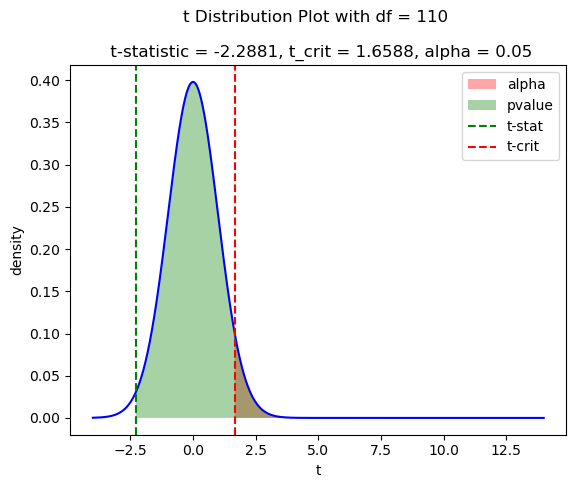

In [41]:
# plot sample distribution 
x = np.arange(-4, 14, 0.001)
plt.plot(x, stats.t.pdf(x, df = df_data_fdi), 
         color='blue')

# plot alpha region
x_alpha = np.arange(stats.t.ppf(1-0.05, df = df_data_fdi), 4, 0.01)
y_alpha = stats.t.pdf(x_alpha, df = df_data_fdi)
plt.fill_between(x = x_alpha, 
                 y1 = y_alpha,
                 facecolor = 'red',
                 alpha = 0.35, 
                 label = 'alpha')

# plot pvalue
x_pvalue = np.arange(result_fdi.statistic, 4, 0.01)
y_pvalue = stats.t.pdf(x_pvalue, df = df_data_fdi)

plt.fill_between(x = x_pvalue, 
                 y1 = y_pvalue,
                 facecolor = 'green',
                 alpha = 0.35, 
                 label = 'pvalue')

# plot t-crit and t-stats
plt.axvline(np.round(result_fdi.statistic, 4), 
            color ="green", 
            linestyle = "--", 
            label ="t-stat")

t_crit = np.round(stats.t.ppf(1-0.05, df = df_data_fdi), 4)
plt.axvline(t_crit, 
            color ="red", 
            linestyle = "--", 
            label ="t-crit")

plt.legend()
plt.xlabel("t")
plt.ylabel("density")


plt.title(f't Distribution Plot with df = {df_data_fdi} \n\n t-statistic = {np.round(result_fdi.statistic, 4)}, t_crit = {np.round(t_crit,4)}, alpha = 0.05');

In [42]:
import pandas as pd
import numpy as np
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

cm = CompareMeans(d1 = DescrStatsW(data=data_fdi_growth), 
                  d2 = DescrStatsW(data=data_fdi_high))

lower, upper = cm.tconfint_diff(alpha=0.05, 
                                alternative='two-sided', 
                                usevar='pooled')

print("Confidence Interval", ":", "[", lower, upper, "]")

Confidence Interval : [ -41.73690600149194 -10.50241355091282 ]


### Conclusion 

* Nilai p > alpha (0.05), maka gagal tolak 𝐻0. Dengan demikian, dapat disimpulkan bahwa jumlah Nilai FDI dinegara yang memiliki level gdpp growth dan high sama.

* Karena interval kepercayaan terletak antara -41.736 dan -10.502, tidak terdapat perbedaan antara FDI dinegara yang memiliki level gdpp growth dan high.

# Inflation

Null hypothesis ($H_0$), alternative hypothesis ($H_1$), and significance level

$H_0$: Inflasi dinegara yang memiliki level gdpp growth dan high sama. 
$$ H_0:\mu_A = \mu_B $$

$H_1$: Inflasi dinegara yang memiliki level gdpp growth dan high tidak sama. 
$$ H_1:\mu_A \geq \mu_B $$

Significance level = 0.05

In [43]:
df_ekonomi.groupby('gdpp_level')["inflation"].sum()

gdpp_level
growth    2.9421
high      0.3646
Name: inflation, dtype: float64

In [44]:
# Inflation - Growth gdpp
data_inflation_growth = df_ekonomi[df_ekonomi['gdpp_level']=="growth"]['inflation'].values

# Inflation - High gdpp
data_inflation_high = df_ekonomi[df_ekonomi['gdpp_level']=="high"]['inflation'].values

# variance 
np.var(data_inflation_growth), np.var(data_inflation_high)

(0.000665062113095238, 5.419882653061224e-05)

In [45]:
from scipy import stats
result_inflation = stats.ttest_ind(a = data_inflation_growth, 
                             b = data_inflation_high, 
                             equal_var=False, 
                             alternative = "greater")

In [46]:
result_inflation.pvalue

1.402983740771478e-10

In [47]:
result_inflation.statistic

6.9511368494021

In [48]:
# Menentukan aturan keputusan
if result_inflation.pvalue<0.05:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

Reject the null hypothesis


In [49]:
df_data_inflation = len(data_inflation_growth)+len(data_inflation_high)-2
df_data_inflation

110

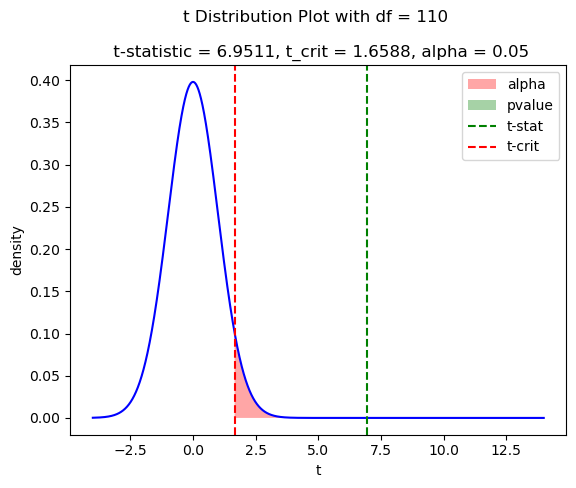

In [50]:
# plot sample distribution 
x = np.arange(-4, 14, 0.001)
plt.plot(x, stats.t.pdf(x, df = df_data_inflation), 
         color='blue')

# plot alpha region
x_alpha = np.arange(stats.t.ppf(1-0.05, df = df_data_inflation), 4, 0.01)
y_alpha = stats.t.pdf(x_alpha, df = df_data_inflation)
plt.fill_between(x = x_alpha, 
                 y1 = y_alpha,
                 facecolor = 'red',
                 alpha = 0.35, 
                 label = 'alpha')

# plot pvalue
x_pvalue = np.arange(result_inflation.statistic, 4, 0.01)
y_pvalue = stats.t.pdf(x_pvalue, df = df_data_inflation)

plt.fill_between(x = x_pvalue, 
                 y1 = y_pvalue,
                 facecolor = 'green',
                 alpha = 0.35, 
                 label = 'pvalue')

# plot t-crit and t-stats
plt.axvline(np.round(result_inflation.statistic, 4), 
            color ="green", 
            linestyle = "--", 
            label ="t-stat")

t_crit = np.round(stats.t.ppf(1-0.05, df = df_data_inflation), 4)
plt.axvline(t_crit, 
            color ="red", 
            linestyle = "--", 
            label ="t-crit")

plt.legend()
plt.xlabel("t")
plt.ylabel("density")


plt.title(f't Distribution Plot with df = {df_data_inflation} \n\n t-statistic = {np.round(result_inflation.statistic, 4)}, t_crit = {np.round(t_crit,4)}, alpha = 0.05');

In [51]:
import pandas as pd
import numpy as np
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

cm = CompareMeans(d1 = DescrStatsW(data=data_inflation_growth), 
                  d2 = DescrStatsW(data=data_inflation_high))

lower, upper = cm.tconfint_diff(alpha=0.05, 
                                alternative='two-sided', 
                                usevar='unequal')

print("Confidence Interval", ":", "[", lower, upper, "]")

Confidence Interval : [ 0.01572959835792823 0.028277544499214626 ]


### Conclusion 

* Nilai p < alpha (0.05), maka tolak 𝐻0. Dengan demikian, dapat disimpulkan bahwa inflasi dinegara yang memiliki level gdpp growth dan high tidak sama.


* Karena interval kepercayaan terletak antara 0.0157 dan 0.028, terdapat perbedaan antara inflasi dinegara yang memiliki level gdpp growth dan high. Dapat dikatakan bahwa inflasi dinegara yang memiliki level gdpp growth lebih besar daripada gdpp high. Dengan demikian, jika negara yang memiliki gdpp level growth ingin bertransformasi menjadi gdpp level high perlu menjaga tingkat inflasi agar stabil.

# Gender Inequality

Null hypothesis ($H_0$), alternative hypothesis ($H_1$), and significance level

$H_0$: Kesetaraan Gender dinegara yang memiliki level gdpp growth dan high sama. 
$$ H_0:\mu_A = \mu_B $$

$H_1$: Kesetaraan Gender dinegara yang memiliki level gdpp growth dan high tidak sama. 
$$ H_1:\mu_A \geq \mu_B $$

Significance level = 0.05

In [52]:
df_ekonomi.groupby('gdpp_level')["gender_inequality"].sum()

gdpp_level
growth    30.856
high       2.415
Name: gender_inequality, dtype: float64

In [53]:
# gender_inequality - Growth gdpp
data_gi_growth = df_ekonomi[df_ekonomi['gdpp_level']=="growth"]['gender_inequality'].values

# gender_inequality - High gdpp
data_gi_high = df_ekonomi[df_ekonomi['gdpp_level']=="high"]['gender_inequality'].values

# variance 
np.var(data_gi_growth), np.var(data_gi_high)

(0.022253579365079372, 0.0025796875000000004)

In [54]:
from scipy import stats
result_gi = stats.ttest_ind(a = data_gi_growth, 
                             b = data_gi_high, 
                             equal_var=False, 
                             alternative = "greater")

In [55]:
result_gi.pvalue

4.370366213637445e-28

In [56]:
result_gi.statistic

14.7396675729038

In [57]:
# Menentukan aturan keputusan
if result_gi.pvalue<0.05:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

Reject the null hypothesis


In [58]:
df_data_gi = len(data_gi_growth)+len(data_gi_high)-2
df_data_gi

110

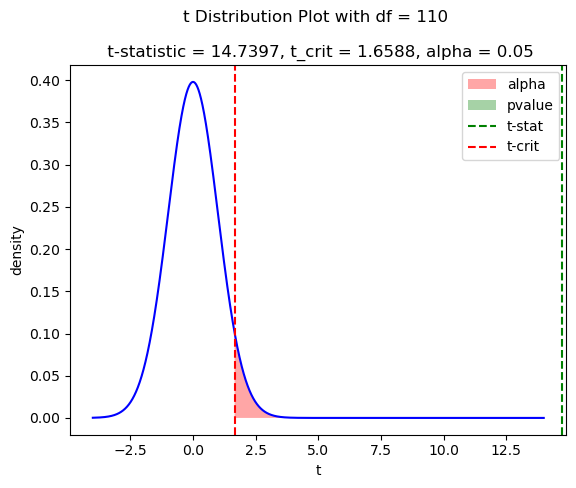

In [59]:
# plot sample distribution 
x = np.arange(-4, 14, 0.001)
plt.plot(x, stats.t.pdf(x, df = df_data_gi), 
         color='blue')

# plot alpha region
x_alpha = np.arange(stats.t.ppf(1-0.05, df = df_data_gi), 4, 0.01)
y_alpha = stats.t.pdf(x_alpha, df = df_data_gi)
plt.fill_between(x = x_alpha, 
                 y1 = y_alpha,
                 facecolor = 'red',
                 alpha = 0.35, 
                 label = 'alpha')

# plot pvalue
x_pvalue = np.arange(result_gi.statistic, 4, 0.01)
y_pvalue = stats.t.pdf(x_pvalue, df = df_data_gi)

plt.fill_between(x = x_pvalue, 
                 y1 = y_pvalue,
                 facecolor = 'green',
                 alpha = 0.35, 
                 label = 'pvalue')

# plot t-crit and t-stats
plt.axvline(np.round(result_gi.statistic, 4), 
            color ="green", 
            linestyle = "--", 
            label ="t-stat")

t_crit = np.round(stats.t.ppf(1-0.05, df = df_data_gi), 4)
plt.axvline(t_crit, 
            color ="red", 
            linestyle = "--", 
            label ="t-crit")

plt.legend()
plt.xlabel("t")
plt.ylabel("density")


plt.title(f't Distribution Plot with df = {df_data_gi} \n\n t-statistic = {np.round(result_gi.statistic, 4)}, t_crit = {np.round(t_crit,4)}, alpha = 0.05');

In [60]:
import pandas as pd
import numpy as np
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

cm = CompareMeans(d1 = DescrStatsW(data=data_gi_growth), 
                  d2 = DescrStatsW(data=data_gi_high))

lower, upper = cm.tconfint_diff(alpha=0.05, 
                                alternative='two-sided', 
                                usevar='unequal')

print("Confidence Interval", ":", "[", lower, upper, "]")

Confidence Interval : [ 0.2432906782404921 0.3188759884261746 ]


### Conclusion 

* Nilai p < alpha (0.05), maka tolak 𝐻0. Dengan demikian, dapat disimpulkan bahwa tingkat kesetaraan gender dinegara yang memiliki level gdpp growth dan high tidak sama.

* Karena interval kepercayaan terletak antara 0.243 dan 0.319, terdapat perbedaan antara tingkat kesetaraan gender dinegara yang memiliki level gdpp growth dan high. Dapat dikatakan bahwa tingkat kesetaraan gender atau ketidaksetaraan dan ketidakadilan yang terjadi antara laki-laki dan perempuan dinegara yang memiliki level gdpp growth lebih besar daripada gdpp high. Dengan demikian, jika negara yang memiliki gdpp level growth ingin bertransformasi menjadi gdpp level high perlu menyetarakan gender dinegaranya.

# Linear Regression

## Transformation With Log

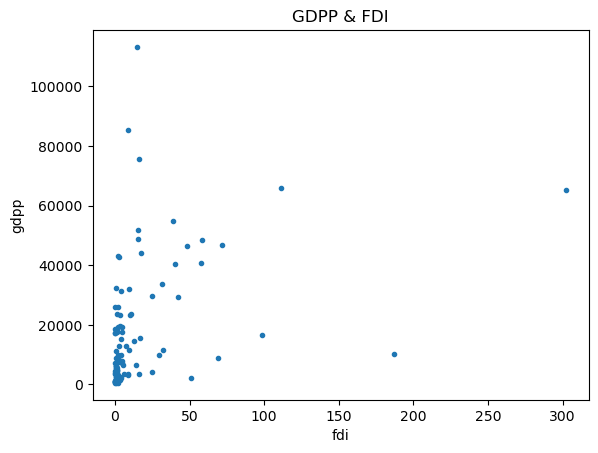

In [80]:
x = df_ekonomi["fdi"]
y = df_ekonomi["gdpp"]

# Plot the data
plt.scatter(x, y, marker=".")

# Add a legend and labels

plt.xlabel("fdi")
plt.ylabel("gdpp")

# Add a title and adjust the margins
plt.title("GDPP & FDI")

# Show the plot
plt.show()

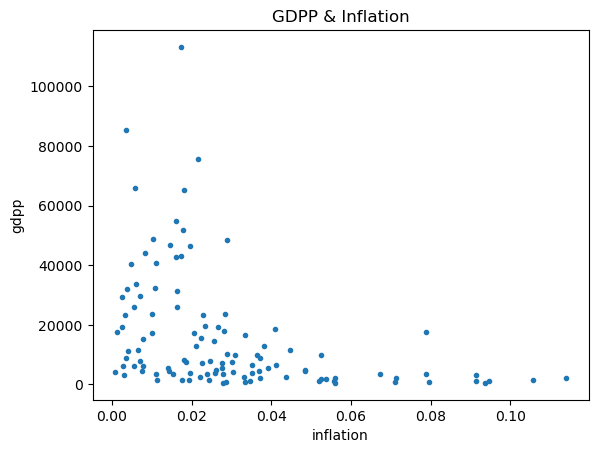

In [81]:
x = df_ekonomi["inflation"]
y = df_ekonomi["gdpp"]

# Plot the data
plt.scatter(x, y, marker=".")

# Add a legend and labels

plt.xlabel("inflation")
plt.ylabel("gdpp")

# Add a title and adjust the margins
plt.title("GDPP & Inflation")

# Show the plot
plt.show()

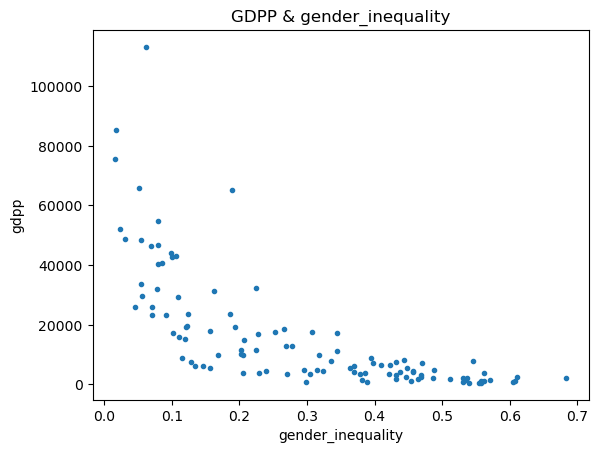

In [82]:
x = df_ekonomi["gender_inequality"]
y = df_ekonomi["gdpp"]

# Plot the data
plt.scatter(x, y, marker=".")

# Add a legend and labels

plt.xlabel("gender_inequality")
plt.ylabel("gdpp")

# Add a title and adjust the margins
plt.title("GDPP & gender_inequality")

# Show the plot
plt.show()

In [83]:
df_ekonomi['log_fdi'] = np.log(df_ekonomi['fdi'])
df_ekonomi['log_inflation'] = np.log(df_ekonomi['inflation'])
df_ekonomi['log_gender_inequality'] = np.log(df_ekonomi['gender_inequality'])
df_ekonomi['log_gdpp'] = np.log(df_ekonomi['gdpp'])

In [84]:
# Create OLS model object
model = smf.ols("log_gdpp ~ log_fdi + log_inflation +  log_gender_inequality", df_ekonomi)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_cross_data = print_coef_std_err(results)

In [85]:
results_cross_data

,coef,std err
Intercept,6.579698,0.255887
log_fdi,0.161948,0.036015
log_inflation,-0.187034,0.070810
log_gender_inequality,-0.996690,0.091710


$$\text{log_gdpp} = 6.58 + 0.16\times\text{log_fdi} - 0.19\times\text{log_inflation} - 0.99\times\text{log_gender_inequality}+ e $$

### Conclusion 

* Koefisien 6.58: Ini adalah koefisien intercept atau nilai konstanta dalam model. Ini menunjukkan nilai perkiraan log_gdpp ketika semua variabel independen (log_fdi, log_inflation, dan log_gender_inequality) memiliki nilai nol.

* Koefisien 0.16 untuk log_fdi: Ini menunjukkan hubungan linier antara log_fdi dengan log_gdpp. Dalam konteks ini, peningkatan satu unit atau satu persen dalam log_fdi dalam bentuk miliar (dengan mempertahankan variabel lainnya tetap) dihubungkan dengan peningkatan sebesar 0.16 dalam log_gdpp.

* Koefisien -0.19 untuk log_inflation: Ini menunjukkan hubungan linier antara log_inflation dengan log_gdpp. Dalam konteks ini, peningkatan satu unit atau satu persen dalam log_inflation atau harga harga secara keseluruhan makin naik (dengan mempertahankan variabel lainnya tetap) dihubungkan dengan penurunan sebesar 0.19 dalam log_gdpp.

* Koefisien -0.99 untuk log_gender_inequality: Ini menunjukkan hubungan linier antara log_gender_inequality dengan log_gdpp. Dalam konteks ini, peningkatan satu unit atau satu persen dalam log_gender_inequality atau perempuan dan laki laki makin tidak setara (dengan mempertahankan variabel lainnya tetap) dihubungkan dengan penurunan sebesar 0.99 dalam log_gdpp.

In [86]:
results.rsquared

0.748650272703284

### Conclusion

* 0.748650272703284, atau sekitar 74.87%, dari variasi dalam variabel dependen "log_gdpp" dapat dijelaskan oleh variabel independen (log_fdi, log_inflation, dan log_gender_inequality) yang ada dalam model regresi linier. Dengan kata lain, model tersebut berhasil menjelaskan sekitar 74.87% dari variasi dalam log_gdpp.

In [91]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               log_gdpp   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     107.2
Date:                Thu, 06 Jul 2023   Prob (F-statistic):           2.99e-32
Time:                        22:06:46   Log-Likelihood:                -110.80
No. Observations:                 112   AIC:                             229.6
Df Residuals:                     108   BIC:                             240.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 6.57

### Conclusion

* Adj. R-squared : 0.742, atau sekitar 74.2%, dari variasi dalam variabel dependen "log_gdpp" dapat dijelaskan oleh kombinasi variabel independen (log_fdi, log_inflation, dan log_gender_inequality) dalam model regresi linier.

**Prob F-Statistics**

$H_0$: FDI, Inflasi dan Kesetaraan Gender secara bersamaan tidak memiliki pengaruh signifikan terhadap gdpp.

$H_1$: FDI, Inflasi dan Kesetaraan Gender secara bersamaan memiliki pengaruh signifikan terhadap gdpp.
    
tingkat signifikansi 0.05

* Prob (F-statistic) : memiliki value 2.99e-32 Dengan nilai p-value yang sangat kecil seperti ini (jauh di bawah tingkat signifikansi yang digunakan seperti 0.05), kita dapat menyimpulkan bahwa terdapat cukup bukti statistik yang kuat untuk menolak hipotesis nol. Dalam konteks ini, itu berarti FDI, Inflasi dan Kesetaraan Gender secara bersamaan memiliki pengaruh atau kontribusi signifikan terhadap gdpp dalam regresi linear.

**Prob T Stats**

FDI

~ $H_0$: FDI tidak memiliki pengaruh signifikan terhadap gdpp.
    
~ $H_1$: FDI memiliki pengaruh signifikan terhadap gdpp.

Inflasi

~ $H_0$: Inflasi tidak memiliki pengaruh signifikan terhadap gdpp.
    
~ $H_1$: Inflasi memiliki pengaruh signifikan terhadap gdpp.

Kesetaraan Gender

~ $H_0$: Kesetaraan Gender tidak memiliki pengaruh signifikan terhadap gdpp.
    
~ $H_1$: Kesetaraan Gender memiliki pengaruh signifikan terhadap gdpp.

tingkat signifikansi : 0.05

Kesimpulan :

* log_fdi: P-value sebesar 0.000 menunjukkan bahwa variabel log_fdi memiliki hubungan yang signifikan secara statistik dengan variabel dependen (log_gdpp) dalam model regresi linier. Karena nilai p-value sangat kecil (lebih kecil dari tingkat signifikansi 0.05), kita dapat menolak hipotesis nol dan menyimpulkan bahwa log_fdi berkontribusi secara signifikan terhadap perubahan dalam log_gdpp.

* log_inflation: P-value sebesar 0.009 menunjukkan bahwa variabel log_inflation juga memiliki hubungan yang signifikan secara statistik dengan variabel dependen (log_gdpp) dalam model regresi linier. Dalam hal ini, kita juga dapat menolak hipotesis nol dan menyimpulkan bahwa log_inflation berkontribusi secara signifikan terhadap perubahan dalam log_gdpp.

* log_gender_inequality: P-value sebesar 0.000 menunjukkan bahwa variabel log_gender_inequality memiliki hubungan yang signifikan secara statistik dengan variabel dependen (log_gdpp) dalam model regresi linier. Seperti pada kasus sebelumnya, kita dapat menolak hipotesis nol dan menyimpulkan bahwa log_gender_inequality berkontribusi secara signifikan terhadap perubahan dalam log_gdpp.

**Prob(JB)**

~ $H_0$: residual dalam model regresi linier tidak mengikuti distribusi normal.
    
~ $H_1$:  residual dalam model regresi linier mengikuti distribusi normal.

* Dengan nilai Prob(JB) sebesar 0.764, probabilitas tersebut cukup tinggi (lebih besar dari tingkat signifikansi yang umumnya digunakan seperti 0.05). Ini menunjukkan bahwa tidak ada cukup bukti statistik yang signifikan untuk menolak hipotesis nol. Dalam konteks ini, hipotesis nol menyatakan bahwa residual dalam model regresi linier mengikuti distribusi normal.

## Assumption

### Normalitas Residual

In [88]:
# Residuals
residuals = results.resid

# Shapiro-Wilk Test for normality
shapiro_test = stats.shapiro(residuals)

# Print the test results
print("Shapiro-Wilk Test:")
print(f"Statistic = {shapiro_test.statistic}, p-value = {shapiro_test.pvalue}")

Shapiro-Wilk Test:
Statistic = 0.9906477332115173, p-value = 0.6425069570541382


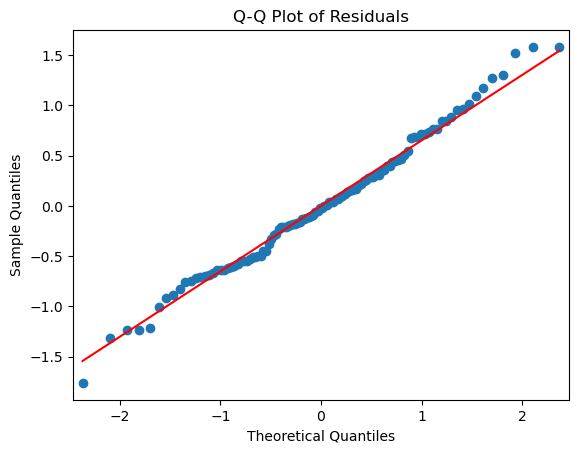

In [89]:
# Plot Q-Q plot
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

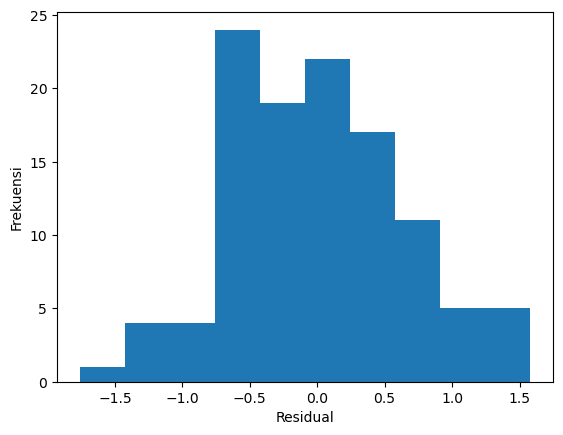

In [90]:
# Histogram residual
plt.hist(residuals, bins=10)
plt.xlabel("Residual")
plt.ylabel("Frekuensi")
plt.show()

### Conclusion

* Nilai p (p-value): Nilai p yang dihasilkan dari uji Shapiro-Wilk. Nilai p ini menunjukkan probabilitas bahwa distribusi data Anda sebenarnya adalah distribusi normal, jika nilai p cukup tinggi (lebih besar dari tingkat signifikansi yang telah ditentukan, biasanya 0.05 atau 0.01). Pada kasus Anda, nilai p-nya adalah 0.6425069570541382.

## Homokedastisitas

In [93]:
# Perform Breusch-Pagan test for homoskedasticity
_, p_val, _, _ = het_breuschpagan(results.resid, results.model.exog)
print(f"\nBreusch-Pagan Test (Homoskedasticity):\n p-value = {p_val}")


Breusch-Pagan Test (Homoskedasticity):
 p-value = 0.14117514171106357


### Conclusion 

* tingkat signifikansi adalah 0.05, karena nilai p-value (0.14117514171106357) lebih besar dari 0.05, kita tidak memiliki cukup bukti statistik yang signifikan untuk menolak hipotesis nol. Dalam konteks ini, hipotesis nol menyatakan bahwa tidak ada heteroskedastisitas (variansi residual konstan) dalam model regresi linier.

* Dengan demikian, berdasarkan nilai p-value, tidak ada cukup bukti statistik yang signifikan untuk menolak asumsi homoskedastisitas dalam model regresi linier. Ini menunjukkan bahwa varian residual dalam model regresi linier dapat dianggap konstan di semua tingkat nilai prediktor (variabel independen).

## Linearitas

In [94]:
# Perform Rainbow test for linearity
rainbow_statistic, rainbow_p_value = linear_rainbow(results)
print(f"\nRainbow Test (Linearity):\n p-value = {rainbow_p_value}")


Rainbow Test (Linearity):
 p-value = 0.35643032951327275


### Conclusion

* tingkat signifikansi adalah 0.05, karena nilai p-value (0.35643032951327275) lebih besar dari 0.05, kita tidak memiliki cukup bukti statistik yang signifikan untuk menolak hipotesis nol. Dalam konteks ini, hipotesis nol menyatakan bahwa hubungan antara variabel independen dan variabel dependen dalam model regresi linier bersifat linier.

* Dengan demikian, berdasarkan nilai p-value, tidak ada cukup bukti statistik yang signifikan untuk menolak asumsi linearitas dalam model regresi linier. Ini menunjukkan bahwa hubungan antara variabel independen dan variabel dependen dapat dianggap bersifat linier dalam model tersebut.

## Linearitas Antar Variabel Independen

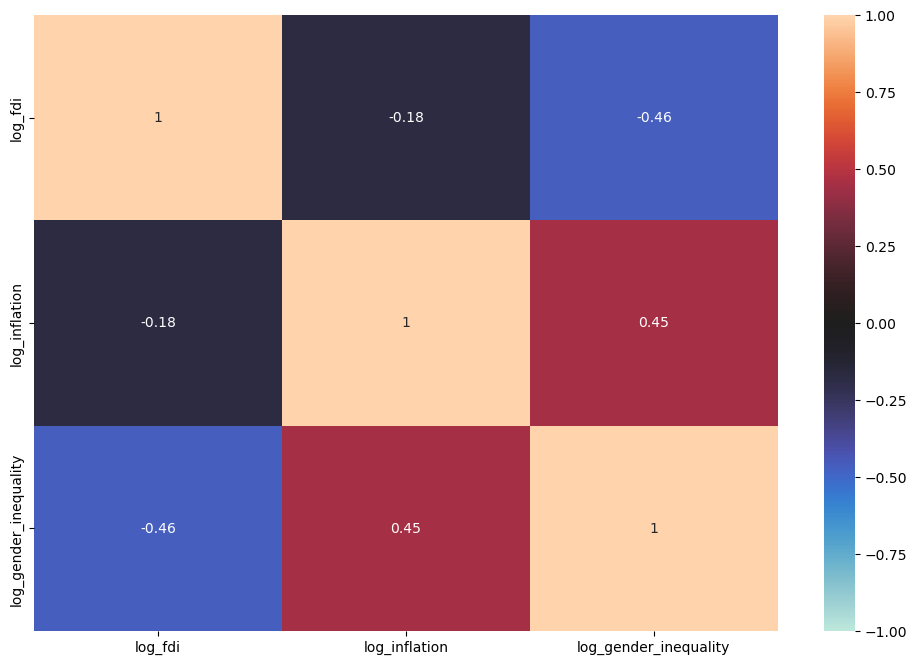

In [100]:
plt.figure(figsize=(12,8))
sns.heatmap(df_ekonomi[["log_fdi","log_inflation","log_gender_inequality"]].corr(), annot=True, vmax=1, vmin=-1, center=0)
plt.show()

### Conclusion

* jika kita lihat dari value korelasi, tidak ada yang memiliki nilai lebih dari 0.8, maka dapat disimpulkan bahwa tidak terdapat korelasi antar variabel independen atau x

# Kesimpulan Keseluruhan.

1. Data yang digunakan pada pemodelan ini ialah data inflasi, fdi, dan gender inequality. Data bersumber dari Macrotrends, Worldbank dan UNDP. 
2. Data yang digunakan yakni dengan nilai inflasi yang diatas 0 dan dibawah 0.05 dan fdi diatas 0.
3. saat uji statistika inference, dengan uji Proporsi Dua Sampel menyatakan jumlah FDI dinegara yang memiliki level gdpp growth dan high sama, inflasi dinegara yang memiliki level gdpp growth dan high tidak sama dan tingkat kesetaraan gender dinegara yang memiliki level gdpp growth dan high tidak sama.
4. saat melakukan linear regression menyatakan Koefisien senilai 6.58 Ini adalah koefisien intercept atau nilai konstanta dalam model. Ini menunjukkan nilai perkiraan log_gdpp ketika semua variabel independen (log_fdi, log_inflation, dan log_gender_inequality) memiliki nilai nol. log_fdi bernilai 0.16 menunjukkan hubungan linier antara log_fdi dengan log_gdpp. Dalam konteks ini, peningkatan satu unit atau satu persen dalam log_fdi dalam bentuk miliar (dengan mempertahankan variabel lainnya tetap) dihubungkan dengan peningkatan sebesar 0.16 dalam log_gdpp. log_inflation bernilai -0.19  menunjukkan hubungan linier antara log_inflation dengan log_gdpp. Dalam konteks ini, peningkatan satu unit atau satu persen dalam log_inflation atau harga harga secara keseluruhan makin naik (dengan mempertahankan variabel lainnya tetap) dihubungkan dengan penurunan sebesar 0.19 dalam log_gdpp. log_gender_inequality bernilai -0.99 menunjukkan hubungan linier antara log_gender_inequality dengan log_gdpp. Dalam konteks ini, peningkatan satu unit atau satu persen dalam log_gender_inequality atau perempuan dan laki laki makin tidak setara (dengan mempertahankan variabel lainnya tetap) dihubungkan dengan penurunan sebesar 0.99 dalam log_gdpp. dan secara uji prob t statistik masing masing variabel independen berpengaruh terhadap variabel dependen baik secara parsial maupun simultan.  sekitar 74.87%, dari variasi dalam variabel dependen "log_gdpp" dapat dijelaskan oleh variabel independen (log_fdi, log_inflation, dan log_gender_inequality) yang ada dalam model regresi linier. Dengan kata lain, model tersebut berhasil menjelaskan sekitar 74.87% dari variasi dalam log_gdpp. dan pada uji asumsi seperti normalitas residual, homokedastisitas, linearitas, linearitas variabel prediktor menyatakan hasil yang cukup baik untuk kebaikan model.

## Saran Kebijakan 

1. Jika negara ingin melakukan transformasi dari yang sebelumnya gdpp growth menjadi negara yang memiliki gdpp high maka perlu menurunkan nilain inflasi dan menurunkan tingkat kesetaraan gender (read : semakin setara) berdasarkan uji proporsi dua sampel yang dilakukan diatas
2. Jika negara ingin melakukan transformasi dari yang sebelumnya gdpp growth menjadi negara yang memiliki gdpp high berdasarkan linear regression maka perlu meningkatkan nilai fdi, menurunkan nilai inflasi dan menurunkan tingkat kesetaraan gender (read : semakin setara), karena berdasarkan uji statistik terbukti secara signifikan memengaruhi nilai dari gdpp.

## Further Research

1. Jika memiliki waktu lebih banyak, lakukan tinjauan teoritis dari masing masing variabel berdasarkan penelitian terdahulu.
2. Dapat pula menggunakan metode regresi logistik berdasarkan negara yang memiliki gdpp growth dan gdpp high.

## Reference

* https://www.pythoncharts.com/matplotlib/pie-chart-matplotlib/
* https://python.plainenglish.io/how-to-make-a-beautiful-donut-chart-and-nested-donut-chart-in-matplotlib-92040c8bbeea
* https://www.macrotrends.net/countries/ranking/foreign-direct-investment
* https://hdr.undp.org/data-center/thematic-composite-indices/gender-inequality-index#/indicies/GII
* https://data.worldbank.org/